In [1]:
import cvxpy as cv
import numpy as np
import random

def generate_A(n):
    A = []
    poss = [i for i in range(n)]
    for i in range(0,n):
        pass_ = False
        while not pass_ :
            try:
                pos_minus = random.choice(poss[i+1:])
            except:
                break
            col = [0 for j in range(n)]
            col[i] = 1
            col[pos_minus] = -1
            if col not in A:
                A.append(col)
            if -1 in np.array(A)[ : , i+1]:
                selection = random.choice([0,1])
                if selection == 1:
                    pass_ = True

    A = np.array(A)
    return A

def generate_problem(n, rango_inf = -200, rango_sup = -1):
    X = cv.Variable((n,1))
    params = np.zeros((1,n))
    params[0,-1] = 1
    obj = cv.Minimize(params@X)
    A = generate_A(n)
    b = np.random.randint(rango_inf, rango_sup,(A.shape[0],1))
    rest = A@X <= b
    rest_0 = np.zeros((n,1))
    problem = cv.Problem(obj, [rest, X >= rest_0])
    return problem, X, A.shape[0]

def generate_problem_2(n, rango_inf = -200, rango_sup = -1):
    X = cv.Variable((n,1))
    params = np.zeros((1,n))
    params[0,-1] = 1
    obj = cv.Minimize(params@X)
    A = generate_A(n)
    b = np.random.randint(rango_inf, rango_sup,(A.shape[0],1))
    rest = A@X <= b
    rest_0 = np.zeros((n,1))
    problem = cv.Problem(obj, [rest, X >= rest_0])
    return problem, X, A.shape[0], b

### Problema: Planificación de proyectos

![title](picture.png)

Para 15 nodos:

In [169]:
n = 15
problem, X, shape = generate_problem(n)

In [170]:
%%timeit
problem.solve()

1.33 ms ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [171]:
shape

31

Para 25 nodos

In [172]:
n = 25
problem, X, shape = generate_problem(n)

In [173]:
%%timeit
problem.solve()

1.41 ms ± 37.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [174]:
shape

71

Para 35 nodos

In [175]:
n = 35
problem, X, shape = generate_problem(n)

In [176]:
%%timeit
problem.solve()

1.52 ms ± 63.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [177]:
shape

102

Para 45 nodos

In [178]:
n = 45
problem, X, shape = generate_problem(n)

In [179]:
%%timeit
problem.solve()

1.59 ms ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [180]:
shape

123

Para 55 nodos

In [181]:
n = 55
problem, X, shape = generate_problem(n)

In [182]:
%%timeit
problem.solve()

1.78 ms ± 56.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [183]:
shape

172

Para 100 nodos

In [184]:
n = 100
problem, X, shape = generate_problem(n)

In [185]:
%%timeit
problem.solve()

2.58 ms ± 33.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [186]:
shape

400

Para 200 nodos

In [187]:
n = 200
problem, X, shape = generate_problem(n)

In [188]:
%%timeit
problem.solve()

4.58 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [189]:
shape

787

Para 400 nodos

In [190]:
n = 400
problem, X, shape = generate_problem(n)

In [191]:
%%timeit
problem.solve()

9.64 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [192]:
shape

1740

Para 600 nodos

In [193]:
n = 600
problem, X, shape = generate_problem(n)

In [194]:
%%timeit
problem.solve()

18 ms ± 534 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [195]:
shape

2364

Para 1000 nodos

In [196]:
n = 1000
problem, X, shape = generate_problem(n)

In [197]:
%%timeit
problem.solve()

37.4 ms ± 482 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [198]:
shape

4325

In [3]:
import matplotlib.pyplot as plt

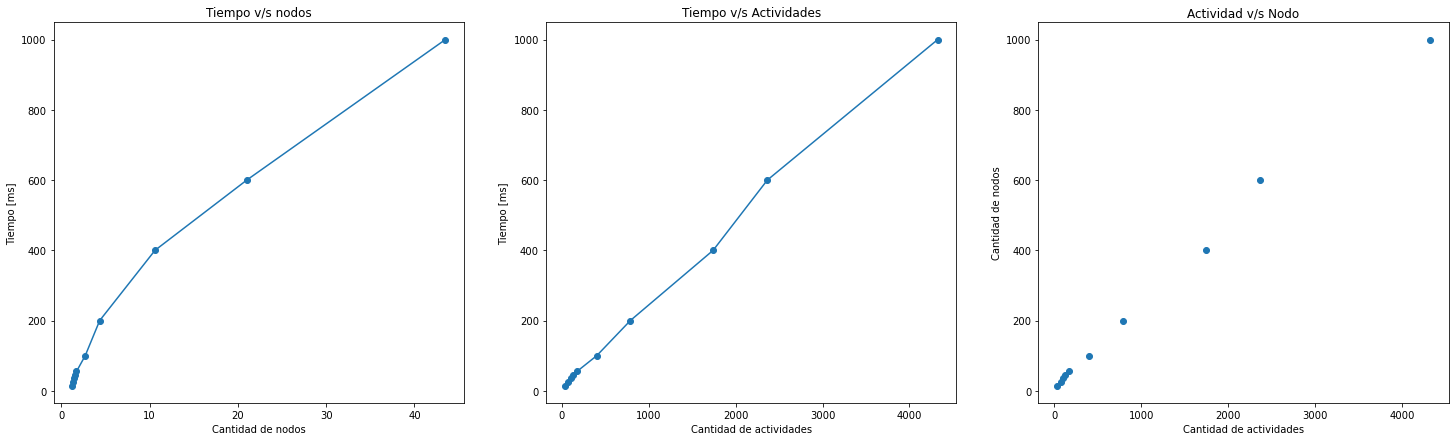

In [22]:
X = [1.23, 1.33, 1.38, 1.58, 1.7, 2.69, 4.33, 10.6, 21, 43.5]
X_ = [31, 71, 102, 123, 172, 400, 787, 1740, 2364, 4325]
Y = [15 ,25 ,35 ,45 ,55 ,100 ,200, 400, 600, 1000]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
axes[0].plot(X, Y)
axes[0].scatter(X, Y)
axes[0].set_title("Tiempo v/s nodos")
axes[0].set_xlabel("Cantidad de nodos")
axes[0].set_ylabel("Tiempo [ms]")

axes[1].plot(X_, Y)
axes[1].scatter(X_, Y)
axes[1].set_title("Tiempo v/s Actividades")
axes[1].set_xlabel("Cantidad de actividades")
axes[1].set_ylabel("Tiempo [ms]")

axes[2].scatter(X_, Y)
axes[2].set_title("Actividad v/s Nodo")
axes[2].set_xlabel("Cantidad de actividades")
axes[2].set_ylabel("Cantidad de nodos")
plt.show()

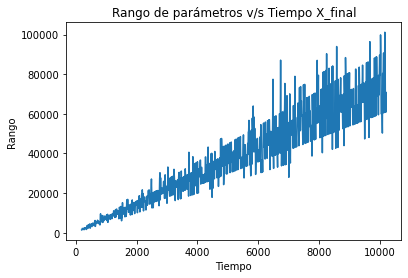

In [26]:
X_ = []
Y = []
for i in range(1000):
    problem, X, shape, b = generate_problem_2(15, rango_inf = -200-10*i, rango_sup = -150-10*i)
    val = problem.solve()
    X_.append(round(val,0))
    Y.append(200+10*i)
plt.plot(Y, X_)
plt.title("Rango de parámetros v/s Tiempo X_final")
plt.xlabel("Tiempo")
plt.ylabel("Rango")
plt.show()